In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

In [4]:
df = pd.read_csv("insurance.csv")

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df.shape

(1338, 7)

In [10]:
df.replace({'smoker':{'yes':1, 'no':0}}, inplace=True)
df.replace({'sex':{'female':0, 'male':1}}, inplace=True)
df.replace({'region':{'southwest':1, 'southeast':2,'northwest':3,'northeast':4}}, inplace=True)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


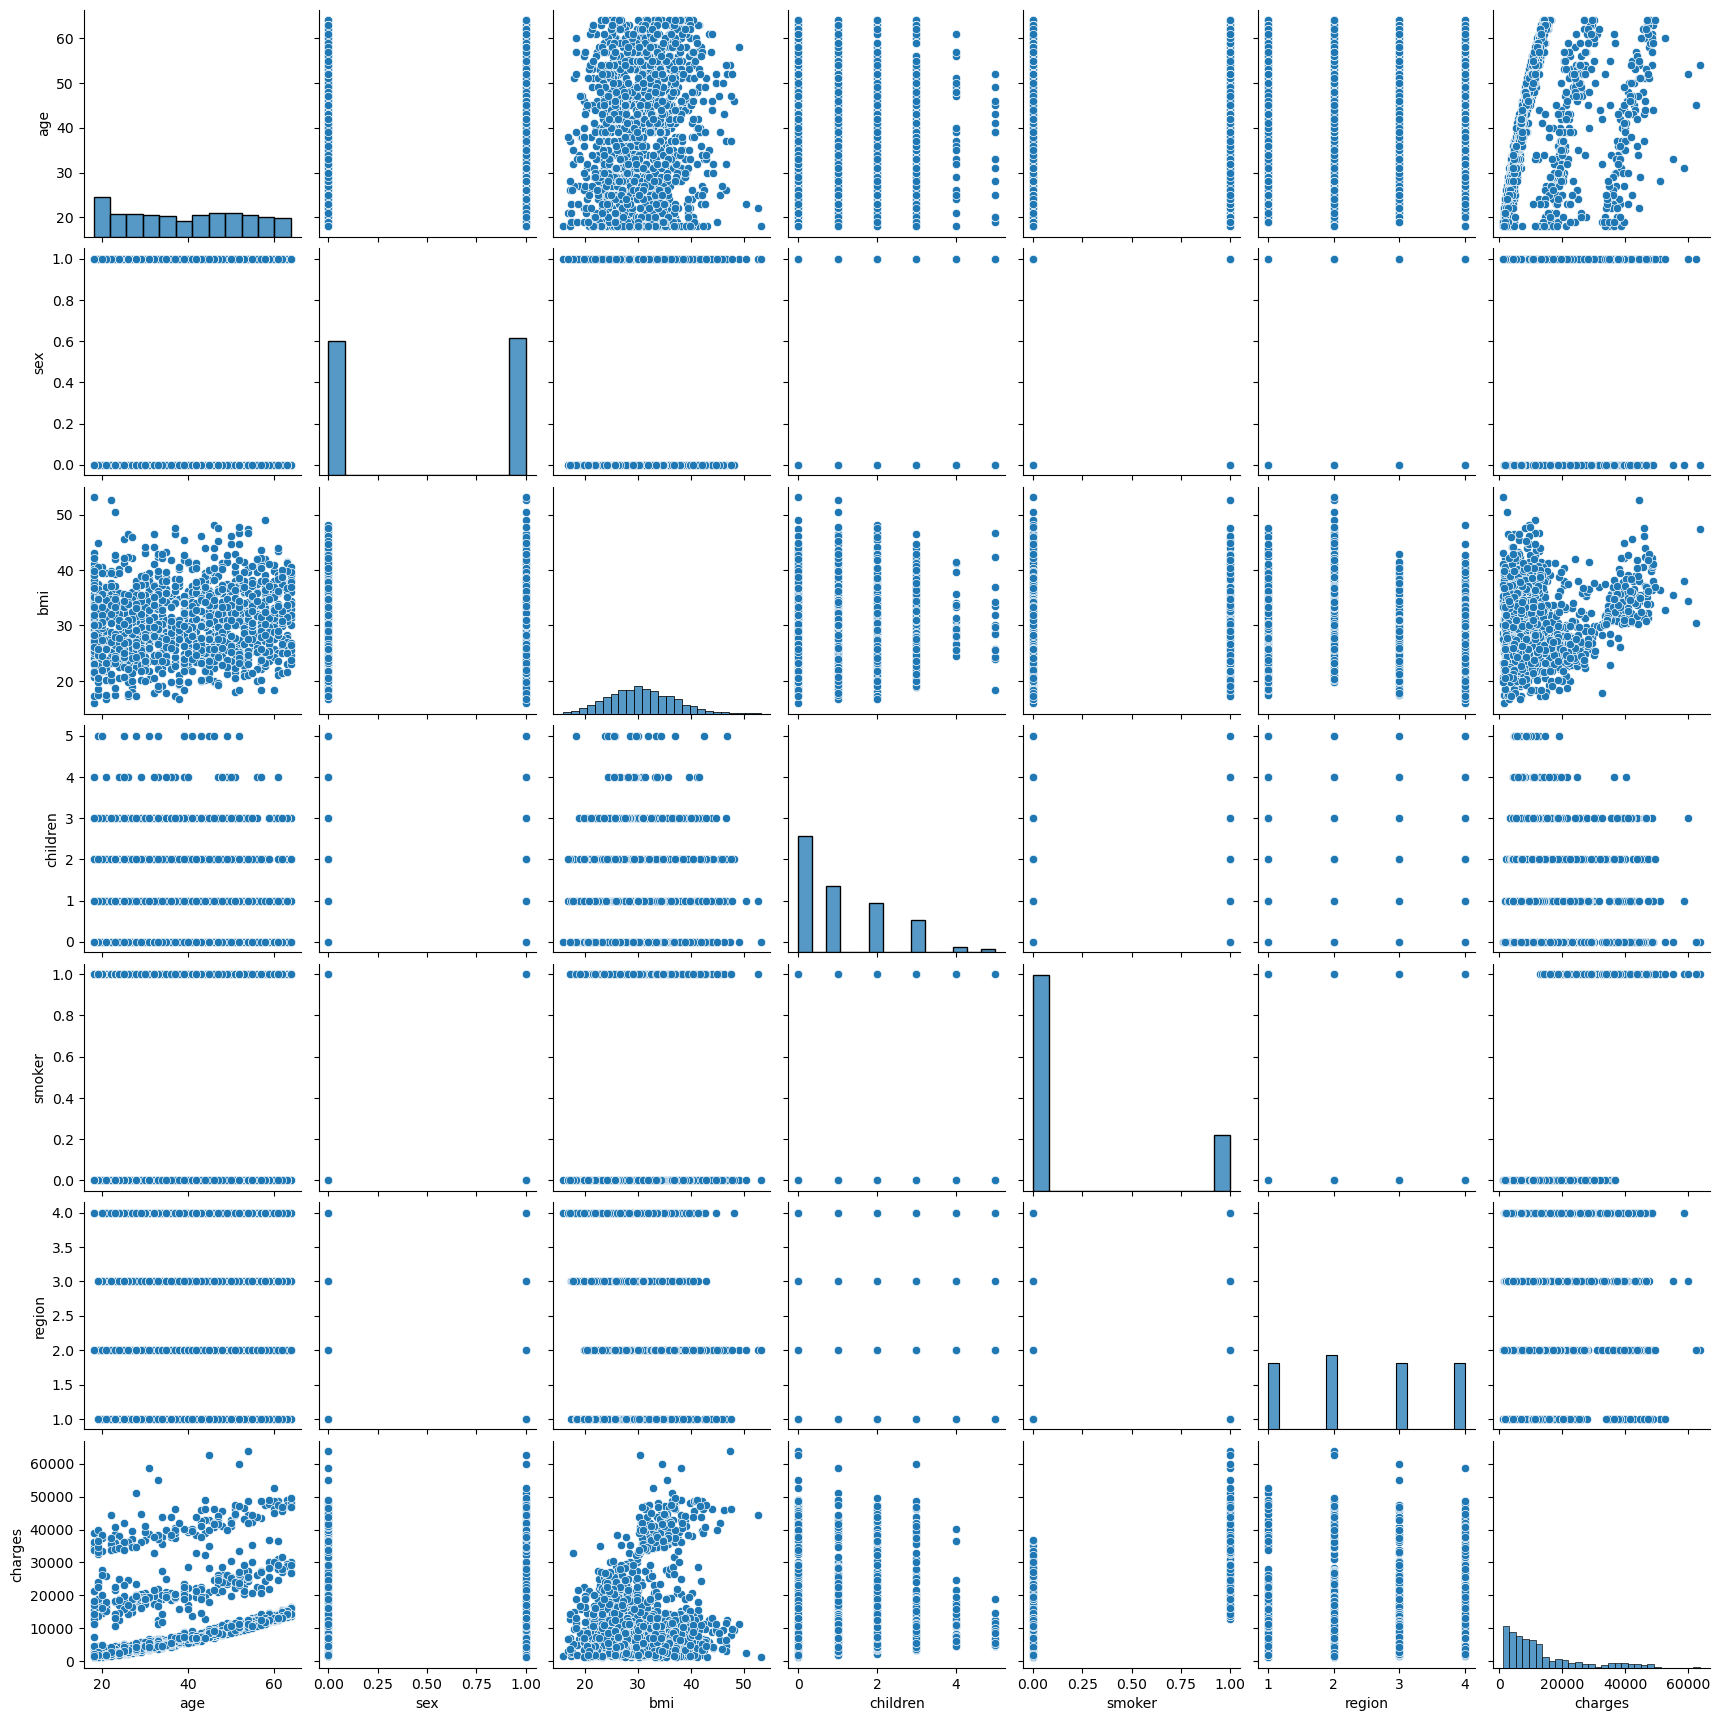

In [11]:
sns.pairplot(df)

<AxesSubplot:>

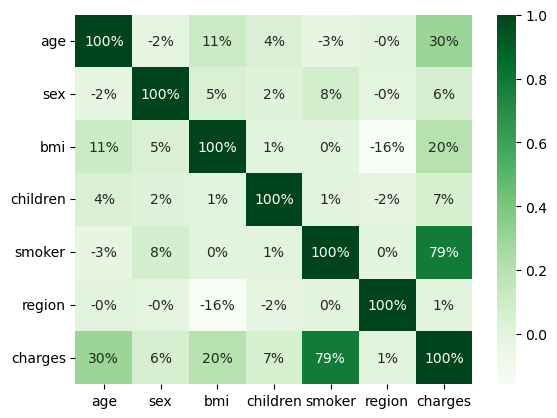

In [12]:
sns.heatmap(df.corr(), annot=True, fmt='.0%',cmap='Greens')

In [13]:
df.drop(columns=['sex','children','region'], inplace=True)
df.head()

,age,bmi,smoker,charges
0,19,27.900,1,16884.92400
1,18,33.770,0,1725.55230
2,28,33.000,0,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


Text(0, 0.5, 'Claim Charges ($)')

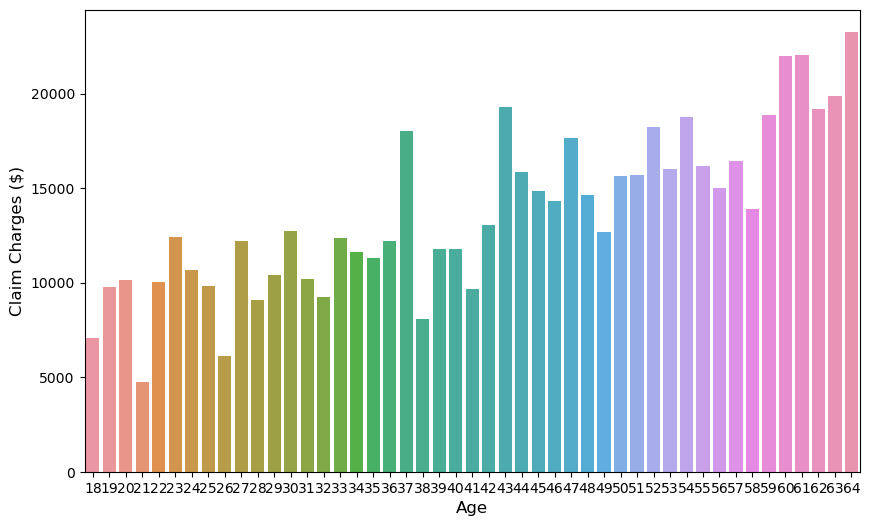

In [14]:
fig = plt.figure(figsize = (10, 6))
sns.barplot(y = 'charges', 
            x = 'age', 
            data = df,
            ci = None)

# set labels
plt.xlabel("Age", size=12)
plt.ylabel("Claim Charges ($)", size=12)


Text(0, 0.5, 'Claim Charges ($)')

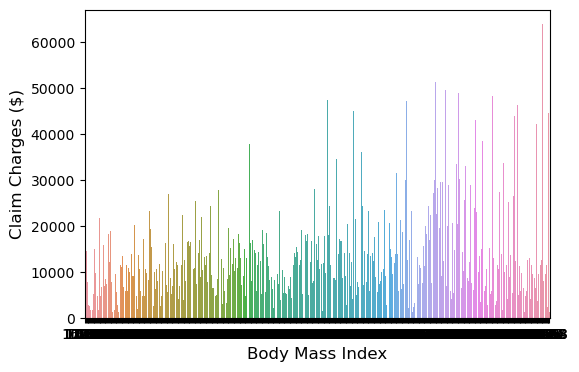

In [15]:
fig = plt.figure(figsize = (6,4))
sns.barplot(y = 'charges', 
            x = 'bmi', 
            data = df,
            ci = None)


plt.xlabel("Body Mass Index", size=12)
plt.ylabel("Claim Charges ($)", size=12)

Text(0, 0.5, 'Claim Charges ($)')

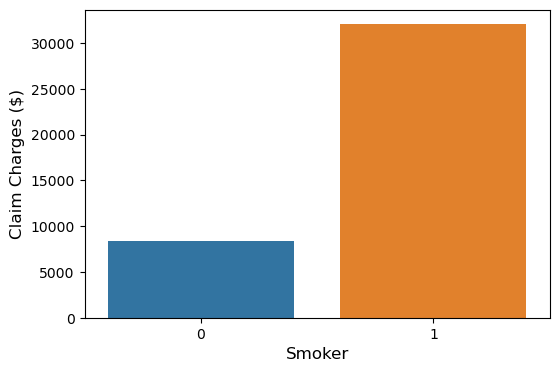

In [16]:
fig = plt.figure(figsize = (6,4))
sns.barplot(y = 'charges', 
            x = 'smoker', 
            data = df,
            ci = None)
 
# set labels
plt.xlabel("Smoker", size=12)
plt.ylabel("Claim Charges ($)", size=12)

In [18]:
X=df.drop(columns='charges', axis=1)
Y=df['charges']

In [20]:
print(X)

      age     bmi  smoker
0      19  27.900       1
1      18  33.770       0
2      28  33.000       0
3      33  22.705       0
4      32  28.880       0
...   ...     ...     ...
1333   50  30.970       0
1334   18  31.920       0
1335   18  36.850       0
1336   21  25.800       0
1337   61  29.070       1

[1338 rows x 3 columns]


In [21]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [25]:
from sklearn.model_selection import train_test_split

df_train,df_test,y_train,y_test=train_test_split(df,Y,test_size=0.2, random_state=100, shuffle=True)

In [26]:
from sklearn import linear_model as lr

reg=lr.LinearRegression()
reg.fit(df_train,y_train)

LinearRegression()

In [27]:
print("coeffs=",reg.coef_)
print("Intercept=",reg.intercept_)

coeffs= [-1.37540557e-13  1.19065991e-13 -7.47428548e-13  1.00000000e+00]
Intercept= -1.8189894035458565e-12


In [28]:
y_pred=pd.Series(reg.predict(df_test))
y_pred

0       1826.84300
1      20177.67113
2       7421.19455
3       1877.92940
4      15518.18025
          ...     
263     1984.45330
264    14283.45940
265    14043.47670
266     8825.08600
267    12124.99240
Length: 268, dtype: float64

In [29]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean absolute error:",mae(y_test,y_pred))

Mean absolute error: 2.8082345735712614e-12


In [30]:
from sklearn.linear_model import LinearRegression

from sklearn import svm
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [31]:
linear = LinearRegression()
svm_model = svm.SVR()

linear.fit(X_train, Y_train)
svm_model.fit(X_train, Y_train)

SVR()

In [32]:
print("Linear Regression Model: " + str(linear.score(X_test, Y_test)))
print("Support Vector Machine Learning Model: " + str(svm_model.score(X_test, Y_test)))


Linear Regression Model: 0.7655078324224212
Support Vector Machine Learning Model: -0.08126500253372249


In [34]:
accuracy = linear.score(X_test,Y_test)
accuracy1 = svm_model.score(X_test,Y_test)
print('Accuracy of the Linear regression model is',accuracy*100,'%')
print('Accuracy of the SVM  model is',accuracy1*100,'%')

Accuracy of the Linear regression model is 76.55078324224212 %
Accuracy of the SVM  model is -8.12650025337225 %
